# Assignment #2
### Walther Alvarez
### CISC 672

In [1]:
%matplotlib inline
from collections import defaultdict
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np

In [2]:
def regionsToGeometry(geofile):
    """Geofile is a json geography file. Returns a dict
    mapping each feature id to a list of polygons 
    describing its geography"""
    res = defaultdict(list)
    data = json.load(open(geofile))
    for f in data['features']:
        region = f['id']
        geo = f['geometry']
        if geo['type'] == 'Polygon':
            for coords in geo['coordinates']:
                res[region].append(coords)
        elif geo['type'] == 'MultiPolygon':
            for polygon in geo['coordinates']:
                res[region].extend(polygon)
    return res

In [3]:
# We build the id-to-geometry dictionary
geofile = 'data/us-states.json'
regions = regionsToGeometry(geofile)

In [4]:
def drawRegion(regions, region, ax, **kwargs):
    for polygon in regions[region]:
        xs, ys = zip(*polygon)
        ax.fill(xs, ys, **kwargs)
    return ax

In [5]:
for s in ['AK', 'HI']:
    del regions[s]

In [6]:
def drawRegions(regions, **kwargs):
    fig = plt.figure(figsize=(12,8))
    ax = plt.gca()
    ax.set_xticks([])
    ax.set_yticks([])
    # continental US x and y range
    ax.set_xlim(-130, -60)
    ax.set_ylim(22, 52)
    for region in regions.keys():
        drawRegion(regions, region, ax, **kwargs)

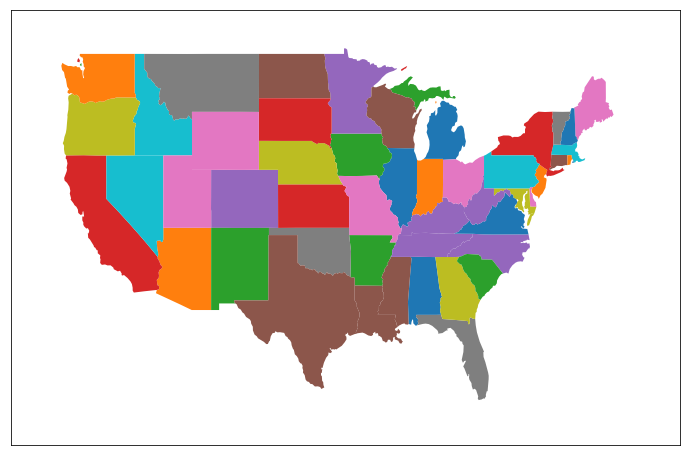

In [7]:
drawRegions(regions)

In [8]:
states = pd.read_csv('data/states.csv',names=['Name', 'state'])
states.set_index('state')
states.head(10)

,Name,state
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [9]:
#print(states.state)
pieces = [] 
columns = ['state', 'sex', 'year', 'name', 'births']
for state in states.state:
    path = 'data/namesbystate/%s.txt' % state
    #print(path)
    frame = pd.read_csv(path, names=columns)
    pieces.append(frame)

# Concatenate everything into a single DataFrame
allNames = pd.concat(pieces, ignore_index=True)
allNames = allNames[allNames.year >= 2000]
allNames


,state,sex,year,name,births
55409,AL,F,2000,Hannah,443
55410,AL,F,2000,Anna,386
55411,AL,F,2000,Madison,382
55412,AL,F,2000,Emily,371
55413,AL,F,2000,Sarah,305
55414,AL,F,2000,Alexis,284
55415,AL,F,2000,Taylor,280
55416,AL,F,2000,Mary,261
55417,AL,F,2000,Elizabeth,242
55418,AL,F,2000,Kayla,239


In [10]:
total_births = allNames.pivot_table('births', index=('state', 'year'), columns='sex', aggfunc=sum)
total_births.head(2000)

sex             F      M
state year              
AK    2000   2286   3321
      2001   2335   3291
      2002   2281   3197
      2003   2225   3211
      2004   2318   3276
      2005   2297   3321
      2006   2384   3339
      2007   2346   3451
      2008   2430   3508
      2009   2333   3463
      2010   2410   3443
      2011   2519   3401
      2012   2300   3352
      2013   2438   3488
      2014   2589   3493
      2015   2424   3393
      2016   2388   3256
      2017   2181   2926
AL    2000  21122  25297
      2001  19967  24123
      2002  19486  23172
      2003  19631  23631
      2004  19361  23520
      2005  19714  23712
      2006  20367  25243
      2007  21322  25055
      2008  20948  25071
      2009  19981  24117
      2010  18885  23323
      2011  18646  22878
...           ...    ...
WV    2006   6998   8756
      2007   7007   8997
      2008   6856   8632
      2009   6740   8544
      2010   6559   8020
      2011   6518   8435
      2012   6549   8290
      2013   6564   8306
      2014   6253   8025
      2015   6246   8061
      2016   6013   7671
      2017   5696   7309
WY    2000   1263   1745
      2001   1095   1799
      2002   1238   1831
      2003   1174   2005
      2004   1268   1816
      2005   1318   2062
      2006   1327   2186
      2007   1493   2119
      2008   1417   2123
      2009   1300   2062
      2010   1266   1904
      2011   1147   1850
      2012   1147   1907
      2013   1235   1969
      2014   1221   1970
      2015   1256   2015
      2016   1144   1738
      2017   1038   1505

[918 rows x 2 columns]

In [11]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
allNames = allNames.groupby(['state', 'year', 'sex']).apply(add_prop)

In [12]:
allNames

,state,sex,year,name,births,prop
55409,AL,F,2000,Hannah,443,0.020973
55410,AL,F,2000,Anna,386,0.018275
55411,AL,F,2000,Madison,382,0.018085
55412,AL,F,2000,Emily,371,0.017565
55413,AL,F,2000,Sarah,305,0.014440
55414,AL,F,2000,Alexis,284,0.013446
55415,AL,F,2000,Taylor,280,0.013256
55416,AL,F,2000,Mary,261,0.012357
55417,AL,F,2000,Elizabeth,242,0.011457
55418,AL,F,2000,Kayla,239,0.011315


In [13]:
allNames.groupby(['state','year', 'sex']).prop.sum()

state  year  sex
AK     2000  F      1.0
             M      1.0
       2001  F      1.0
             M      1.0
       2002  F      1.0
             M      1.0
       2003  F      1.0
             M      1.0
       2004  F      1.0
             M      1.0
       2005  F      1.0
             M      1.0
       2006  F      1.0
             M      1.0
       2007  F      1.0
             M      1.0
       2008  F      1.0
             M      1.0
       2009  F      1.0
             M      1.0
       2010  F      1.0
             M      1.0
       2011  F      1.0
             M      1.0
       2012  F      1.0
             M      1.0
       2013  F      1.0
             M      1.0
       2014  F      1.0
             M      1.0
                   ... 
WY     2003  F      1.0
             M      1.0
       2004  F      1.0
             M      1.0
       2005  F      1.0
             M      1.0
       2006  F      1.0
             M      1.0
       2007  F      1.0
             M      1.0

In [14]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = allNames.groupby(['state', 'year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)
top1000 = top1000.set_index('state','sex')

In [15]:
top1000[:5]

,sex,year,name,births,prop
state,,,,,
AK,F,2000,Hannah,58,0.025372
AK,F,2000,Madison,50,0.021872
AK,F,2000,Emily,48,0.020997
AK,F,2000,Sarah,39,0.017060
AK,F,2000,Ashley,36,0.015748


In [16]:
top1000[-5:]

,sex,year,name,births,prop
state,,,,,
WY,M,2017,Bryson,5,0.003322
WY,M,2017,Brayden,5,0.003322
WY,M,2017,Austin,5,0.003322
WY,M,2017,Abel,5,0.003322
WY,M,2017,Zander,5,0.003322


In [17]:
def makeChoroplethMap(regions, data, col, label=None, cmap=cm.Spectral, figsize=(12,8), **kwargs):
    fig = plt.figure()
    #fig.figsize = figsize
    fig.set_figwidth(figsize[0])
    fig.set_figheight(figsize[1])
    ax = plt.gca()
    ax.set_position([0.0, 0.0, 0.94, 0.96])
    ax.set_xlim(-130, -60)
    ax.set_ylim(22, 52)
    knownStates = set(data.index)
    vmin = data[col].min()
    vmax = data[col].max()
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    for region in regions:
        if region in knownStates:
            color = cmap(norm(data.loc[region][col]))
            drawRegion(regions, region, ax, color=color, **kwargs)
    if label:
        ax.set_title(label, loc='center')
    ax1 = fig.add_axes([0.90, 0.0, 0.04, 0.96])
    cb1=mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                  norm=norm,
                                  orientation='vertical')
    ax.set_xticks([])
    ax.set_yticks([])
    fig.canvas.draw()
    return ax

In [18]:
def makeDiversityMap(regions, data, year, sex, q, cmap=cm.Spectral, **kwargs):
    def get_quantile_count(group, q=q):
        group = group.sort_values(by='prop', ascending=False)
        group1 = np.asscalar(group.prop.cumsum().searchsorted(q)+1)
        return group1 
    yr = data[data.year == year] 
    div = yr.groupby(['state', 'sex']).apply(get_quantile_count) 
    div1 = div.unstack('sex')
    lbl = ('Diversity (' + str(q) + '%): ' + str(year) + ', ' + sex + '')
    makeChoroplethMap(regions,div1,sex,label=lbl,**kwargs)

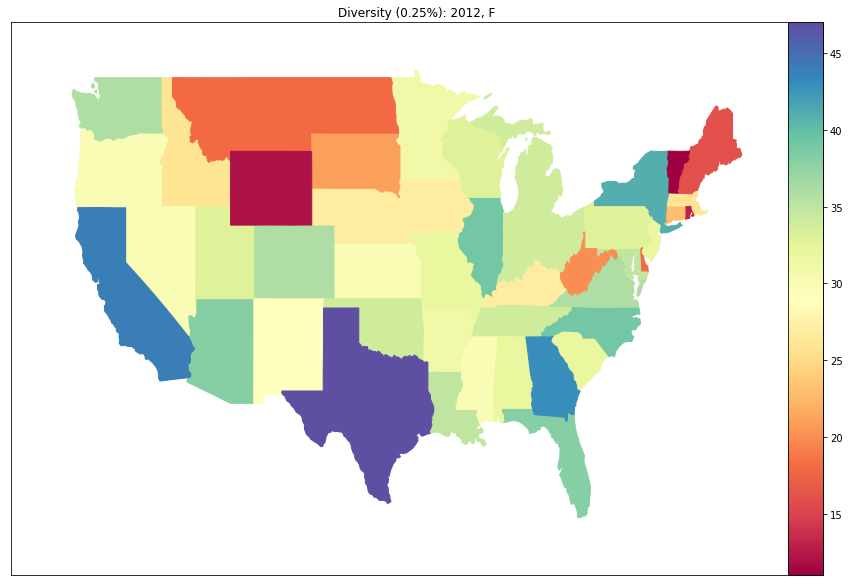

In [19]:
makeDiversityMap(regions, top1000, 2012, 'F', 0.25)

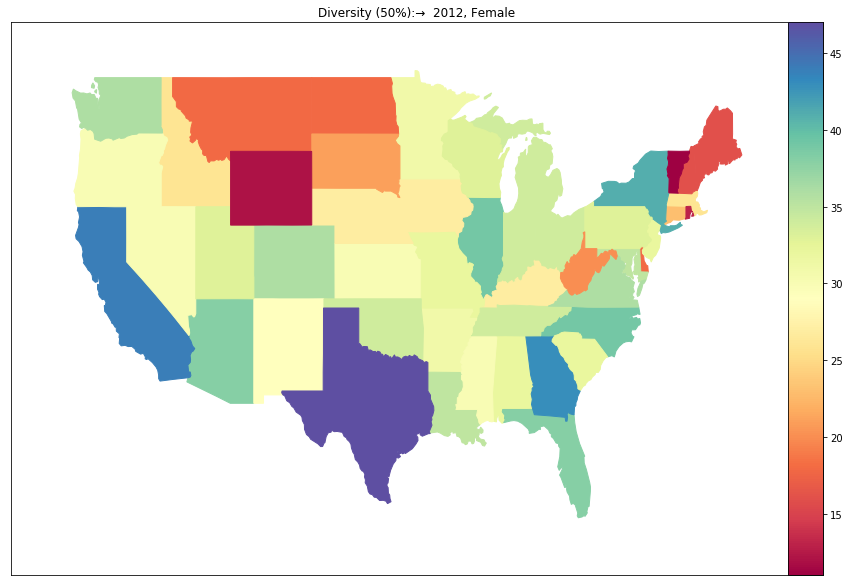

In [20]:
def get_quantile_count(group, q=0.25):
    group = group.sort_values(by='prop', ascending=False)
    group1 = np.asscalar(group.prop.cumsum().searchsorted(q)+1)
    return group1
sex = 'M'
yr2012 = top1000[top1000.year == 2012]
div = yr2012.groupby(['state', 'sex']).apply(get_quantile_count)
div2012 = div.unstack('sex')
makeChoroplethMap(regions, div2012, 'F', label='Diversity (50%):→  2012, Female') 